# Retrieving and Preparing Data

In [14]:
###Import Libraries###
import os

In [ ]:
###Filter out only the lines that matter###

#Code from https://www.geeksforgeeks.org/how-to-read-multiple-text-files-from-folder-in-python/
#https://stackoverflow.com/questions/36247525/printing-line-that-ends-with-a-specific-character
#https://stackoverflow.com/questions/49223576/print-multiple-lines-between-two-specific-lines-keywords-from-a-text-file

# Folder Path
path = "raw_data/"
  
# Change the directory
os.chdir(path)
  
# Read text File
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        for line in f:
          if line.rstrip().endswith('spaced'):
            print(line)
#the data is all now read into another text document called output.txt            

# iterate through all file
for file in os.listdir():
  if file.endswith(".txt"):
        file_path = f"{path}/{file}"
  
        # call read text file function from above
        read_text_file(file_path)


In [15]:
###importing more libraries###
import pandas as pd
import re
from pandas import DataFrame
import numpy as np

In [ ]:
###Splitting data###
readOutput = open("output.txt", "r")
inputString = str(readOutput.read())
#print(inputString)

#Using RegEx to split with multiple delimiters:
#https://stackoverflow.com/questions/4998629/split-string-with-multiple-delimiters-in-python

#Separating out the color and time data from everything else

timeSplit = re.split('2021 | GMT| spaced|\)', inputString)
#print(timeSplit)

#About Wildcards: https://www.educative.io/edpresso/how-to-implement-wildcards-in-python

#filtering out only colors and times
for word in timeSplit:
        # The . symbol is a wildcard
        if re.search('..:..:..', word) : 
                print(word, file=open("time_date_output.txt", "a"))
        elif re.search('.+,.+,.+', word) :
                print(word, file=open("time_date_output.txt", "a"))

#outputs ONLY times and HSV values to a file called time_date_output.txt

In [ ]:
tdOutput = open("time_date_output.txt", "r")
tdString = str(tdOutput.read())

tdSplit = re.split('\n', tdString)
#print(tdSplit)

#https://stackoverflow.com/questions/6613831/merge-several-regular-expressions-into-one-re

re1 = r'(..:..:..\n.+,.+,.+)'
re1_matches = re.findall(re1, tdString)
re1_matches #this also conveniently filters out duplicate timestamps

re2 = []

for string in re1_matches:
    new_string = string.replace(":", ", ")
    re2.append(new_string)
#print(re2)

re3 = []

for string in re2:
    new_string2 = string.replace("\n", ", ")
    re3.append(new_string2)

print(re3)

# Producing the Dataframe

In [17]:
###Dataframe###
#I edited the file outside of this application to get the formatting right for reading into Pandas
#A classic pandas dataframe from a csv

csvFormattedPath = "re4.txt"
df = pd.read_csv(csvFormattedPath, sep=',', header=None, names=['hour','minute','second','hue','chroma','brightness'])
df

,hour,minute,second,hue,chroma,brightness
0,14,24,25,0,50,50
1,14,24,25,60,50,50
2,14,24,25,120,50,50
3,14,24,25,180,50,50
4,14,24,25,240,50,50
...,...,...,...,...,...,...
2569,20,24,20,60,12,99
2570,20,24,20,120,68,99
2571,20,24,20,180,39,69
2572,20,24,20,240,100,58


In [18]:
#Splitting time into a decimal instead of hour:minute
df['time'] = df['hour']+(df['minute']/60)
df

,hour,minute,second,hue,chroma,brightness,time
0,14,24,25,0,50,50,14.4
1,14,24,25,60,50,50,14.4
2,14,24,25,120,50,50,14.4
3,14,24,25,180,50,50,14.4
4,14,24,25,240,50,50,14.4
...,...,...,...,...,...,...,...
2569,20,24,20,60,12,99,20.4
2570,20,24,20,120,68,99,20.4
2571,20,24,20,180,39,69,20.4
2572,20,24,20,240,100,58,20.4


In [19]:
#Adding categories in groups of 4 hours
df['category'] = (df['time']/4).apply(np.ceil)
df

,hour,minute,second,hue,chroma,brightness,time,category
0,14,24,25,0,50,50,14.4,4.0
1,14,24,25,60,50,50,14.4,4.0
2,14,24,25,120,50,50,14.4,4.0
3,14,24,25,180,50,50,14.4,4.0
4,14,24,25,240,50,50,14.4,4.0
...,...,...,...,...,...,...,...,...
2569,20,24,20,60,12,99,20.4,6.0
2570,20,24,20,120,68,99,20.4,6.0
2571,20,24,20,180,39,69,20.4,6.0
2572,20,24,20,240,100,58,20.4,6.0


In [20]:
#certain entries were categorized incorrectly so they have to be manually changed
df.at[468, 'category'] = 1
df.at[469, 'category'] = 1
df.at[470, 'category'] = 1
df.at[471, 'category'] = 1
df.at[472, 'category'] = 1
df.at[473, 'category'] = 1
df.at[1584, 'category'] = 1
df.at[1585, 'category'] = 1
df.at[1586, 'category'] = 1
df.at[1587, 'category'] = 1
df.at[1588, 'category'] = 1
df.at[1589, 'category'] = 1

In [ ]:
#debugging
early = df['time']==0
early_df=df[(early)]
early_df

# Data visualisation

In [21]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from numpy import *
from matplotlib.pyplot import *
import seaborn as sns

### Preliminary visualization

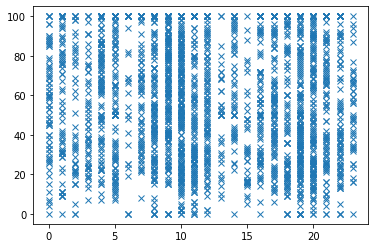

In [22]:
#time and chroma overall. This doesn't show us much.
plt.plot(df['hour'], df['chroma'], 'x')

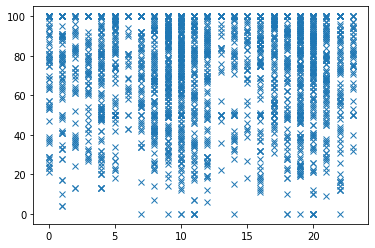

In [23]:
#time and value overall. This doesn't show us much either.
plt.plot(df['hour'], df['brightness'], 'x')

C:\Users\Bobinski\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


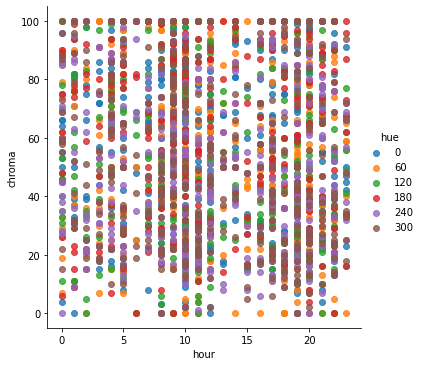

In [24]:
#A slight improvement, but this is still incredibly hard to read.
sns.lmplot('hour', 'chroma', data=df, hue='hue', fit_reg=False)
plt.show()

### Trying to be more specific
Need to be more specific in order to get any meaningful information.
This divides the dataframe into the color categories

In [25]:
red = df['hue'] == 0
red_df = df[(red)]
yellow = df['hue'] == 60
yellow_df = df[(yellow)]
green = df['hue'] == 120
green_df = df[(green)]
cyan = df['hue'] == 180
cyan_df = df[(cyan)]
blue = df['hue'] == 240
blue_df = df[(blue)]
magenta = df['hue'] == 300
magenta_df = df[(magenta)]

In [27]:
h000 = plt.imread("images/000h.png")
h060 = plt.imread("images/060h.png")
h120 = plt.imread("images/120h.png")
h180 = plt.imread("images/180h.png")
h240 = plt.imread("images/240h.png")
h300 = plt.imread("images/300h.png")

### Overall Color Preferences: Chroma and Brightness
The majority of responses were towards the top-right, indicating a strong preference for bright and saturated colors.

Text(0, 0.5, 'Brightness')

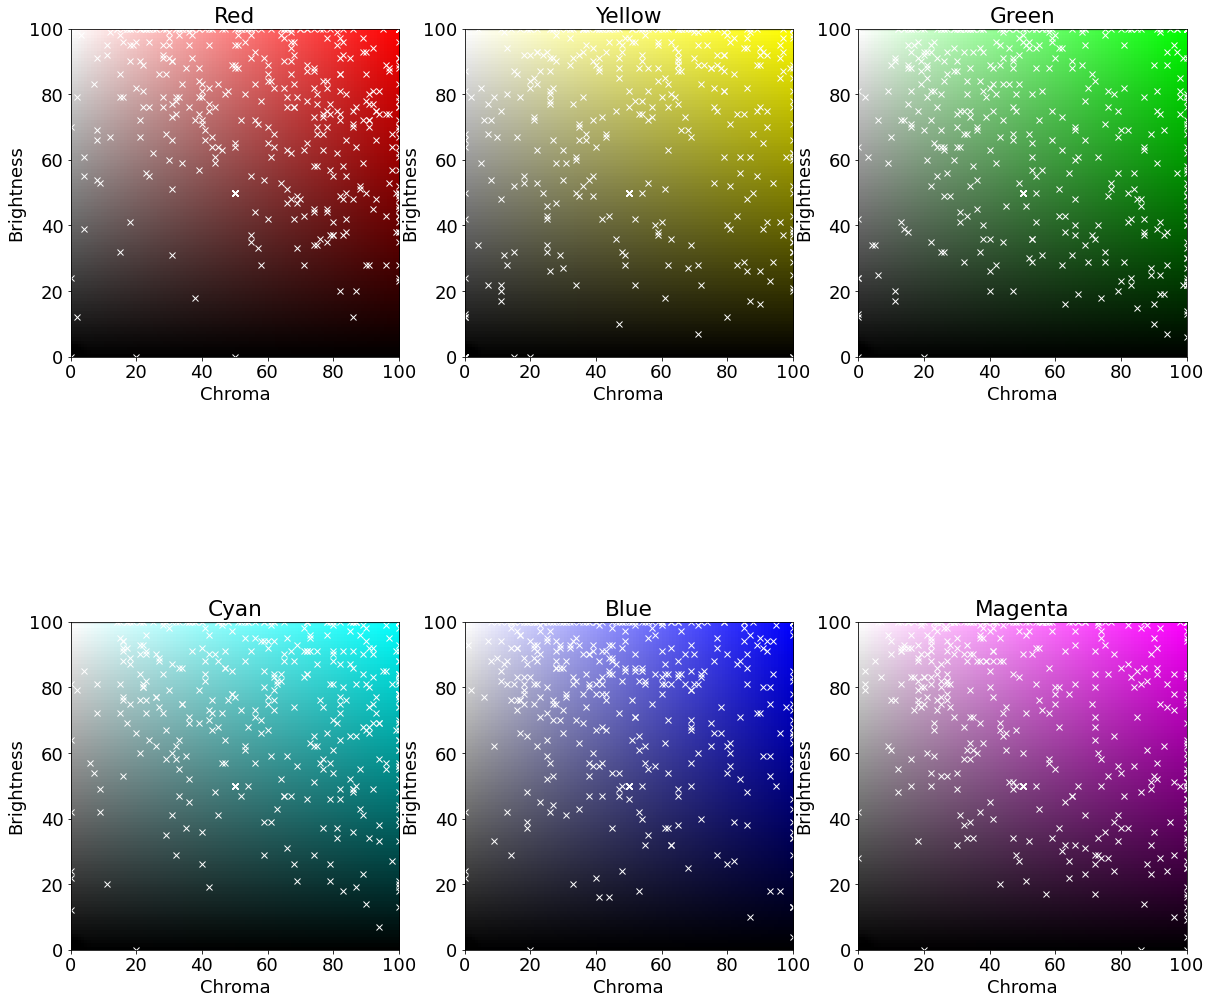

In [28]:
matplotlib.rcParams.update({'font.size': 18})
fig,ax = plt.subplots(nrows = 2,ncols = 3, figsize=(20,20))

ax[0,0].imshow(h000, extent=[0, 100, 0, 100])
ax[0,0].plot(red_df['chroma'], red_df['brightness'], 'x', color="white")
ax[0,0].title.set_text('Red')
ax[0,0].set_xlabel('Chroma')
ax[0,0].set_ylabel('Brightness')

ax[0,1].imshow(h060, extent=[0, 100, 0, 100])
ax[0,1].plot(yellow_df['chroma'], yellow_df['brightness'], 'x', color="white")
ax[0,1].title.set_text('Yellow')
ax[0,1].set_xlabel('Chroma')
ax[0,1].set_ylabel('Brightness')

ax[0,2].imshow(h120, extent=[0, 100, 0, 100])
ax[0,2].plot(green_df['chroma'], green_df['brightness'], 'x', color="white")
ax[0,2].title.set_text('Green')
ax[0,2].set_xlabel('Chroma')
ax[0,2].set_ylabel('Brightness')

ax[1,0].imshow(h180, extent=[0, 100, 0, 100])
ax[1,0].plot(cyan_df['chroma'], cyan_df['brightness'], 'x', color="white")
ax[1,0].title.set_text('Cyan')
ax[1,0].set_xlabel('Chroma')
ax[1,0].set_ylabel('Brightness')

ax[1,1].imshow(h240, extent=[0, 100, 0, 100])
ax[1,1].plot(blue_df['chroma'], blue_df['brightness'], 'x', color="white")
ax[1,1].title.set_text('Blue')
ax[1,1].set_xlabel('Chroma')
ax[1,1].set_ylabel('Brightness')

ax[1,2].imshow(h300, extent=[0, 100, 0, 100])
ax[1,2].plot(magenta_df['chroma'], magenta_df['brightness'], 'x', color="white")
ax[1,2].title.set_text('Magenta')
ax[1,2].set_xlabel('Chroma')
ax[1,2].set_ylabel('Brightness')

# Basic Distributions

### Basic stats

In [29]:
df[['hue','chroma','brightness']].groupby('hue').mean()

,chroma,brightness
hue,,
0,60.060606,74.503497
60,55.848485,73.025641
120,54.435897,69.874126
180,62.137529,74.575758
240,50.610723,76.487179
300,53.172494,72.312354


In [30]:
df[['hue','chroma','brightness']].groupby('hue').median()

,chroma,brightness
hue,,
0,62,78
60,54,82
120,50,75
180,64,80
240,48,83
300,49,80


### Basic distribution visualisations

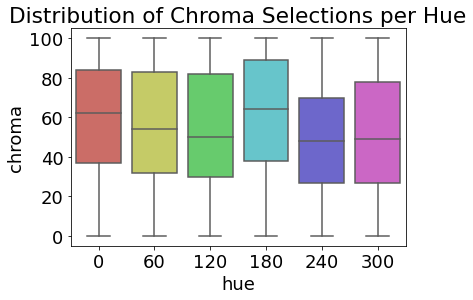

In [31]:
sns.boxplot(x="hue", y="chroma", data=df, palette="hls").title.set_text('Distribution of Chroma Selections per Hue')

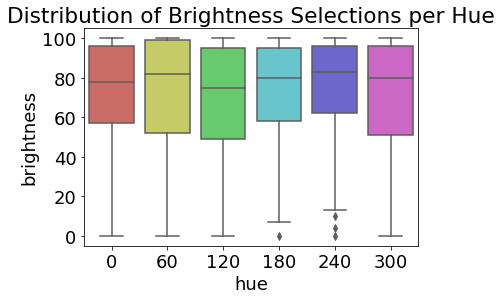

In [32]:
sns.boxplot(x="hue", y="brightness", data=df, palette="hls").title.set_text('Distribution of Brightness Selections per Hue')

The next set of charts are incredibly hard to read, so I opted for a kdeplot in the set after

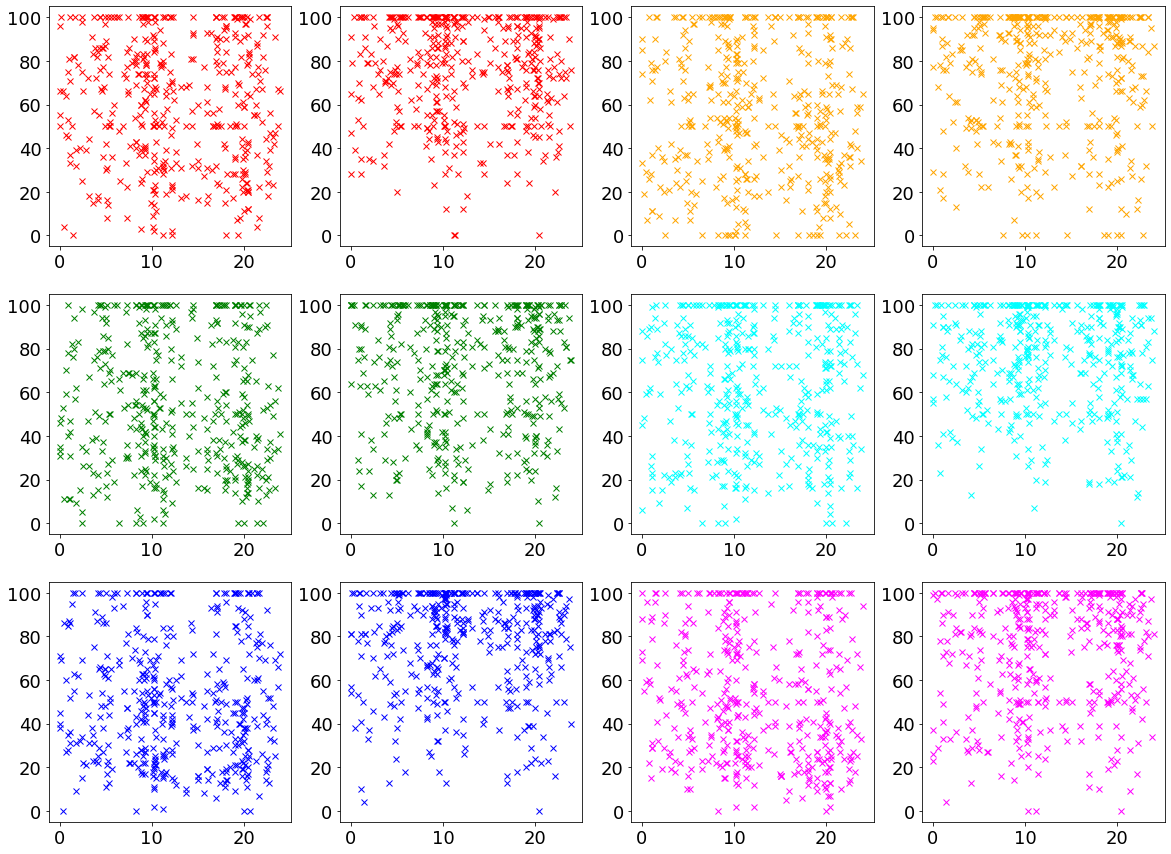

In [33]:
fig,ax = plt.subplots(nrows = 3,ncols = 4, figsize=(20,15))
ax[0,0].plot(red_df['time'], red_df['chroma'], 'x', color="Red")
ax[0,1].plot(red_df['time'], red_df['brightness'], 'x', color="Red")
ax[0,2].plot(yellow_df['time'], yellow_df['chroma'], 'x', color="Orange")
ax[0,3].plot(yellow_df['time'], yellow_df['brightness'], 'x', color="Orange")

ax[1,0].plot(green_df['time'], green_df['chroma'], 'x', color="Green")
ax[1,1].plot(green_df['time'], green_df['brightness'], 'x', color="Green")
ax[1,2].plot(cyan_df['time'], cyan_df['chroma'], 'x', color="Cyan")
ax[1,3].plot(cyan_df['time'], cyan_df['brightness'], 'x', color="Cyan")

ax[2,0].plot(blue_df['time'], blue_df['chroma'], 'x', color="Blue")
ax[2,1].plot(blue_df['time'], blue_df['brightness'], 'x', color="Blue")
ax[2,2].plot(magenta_df['time'], magenta_df['chroma'], 'x', color="Magenta")
ax[2,3].plot(magenta_df['time'], magenta_df['brightness'], 'x', color="Magenta")

### Response Density 1
This is much easier to read than the charts immediately above this, isn't it? It shows the same information, though.

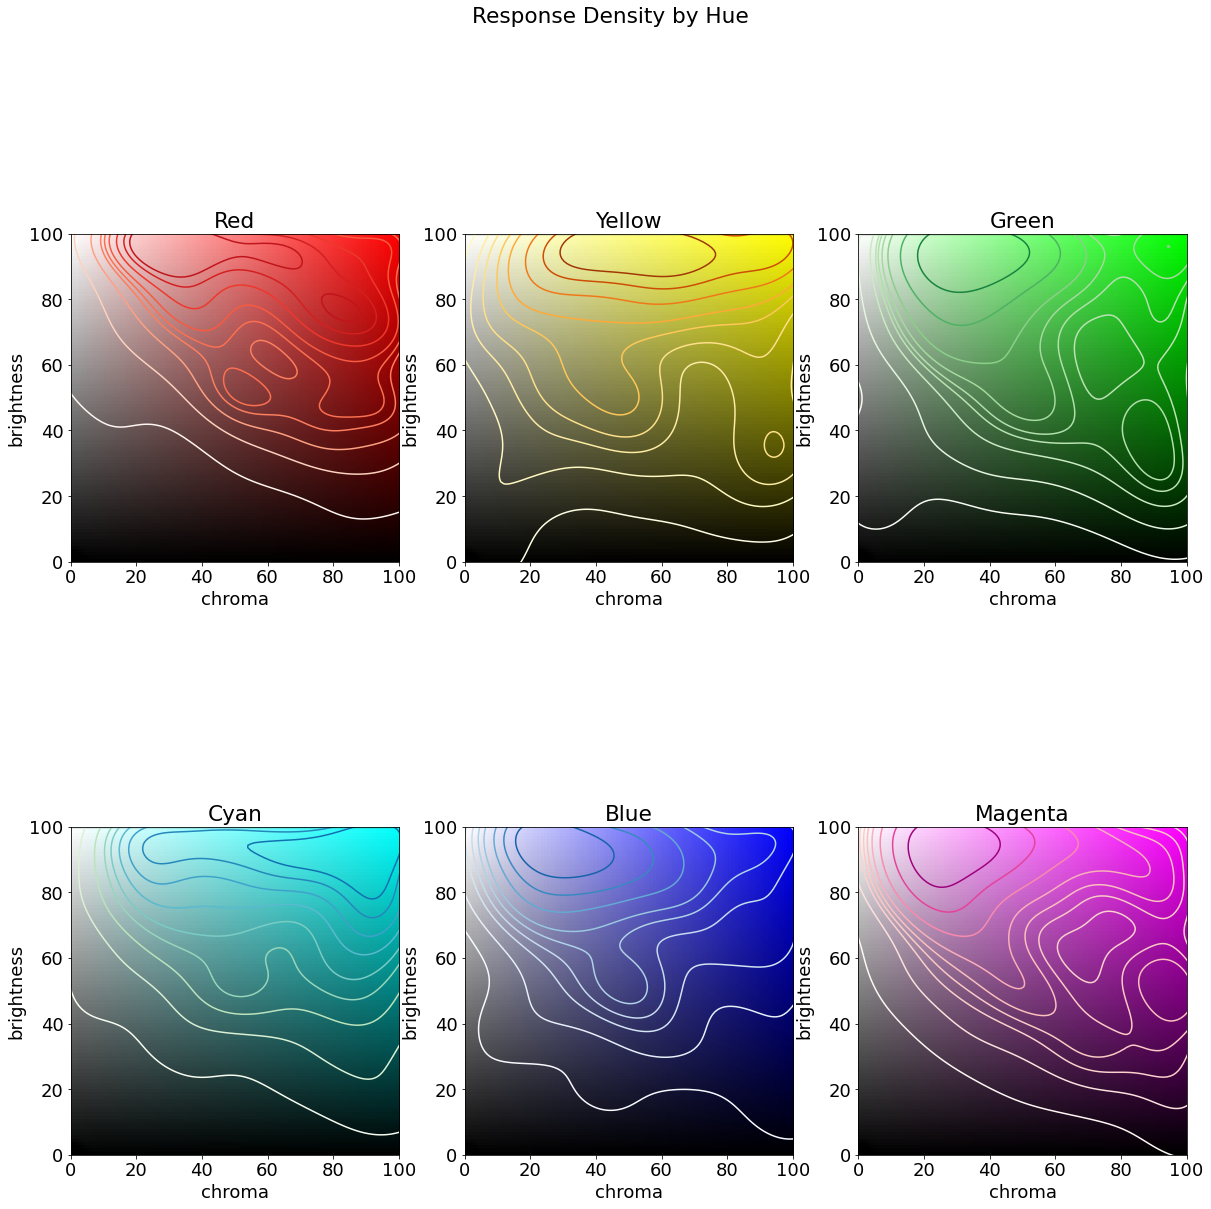

In [34]:
fig, axes = plt.subplots(2, 3, figsize=(20,20))

fig.suptitle('Response Density by Hue')

rplt2 = sns.kdeplot(ax=axes[0, 0], data=red_df, x='chroma', y='brightness', cmap="Reds")
yplt2 = sns.kdeplot(ax=axes[0, 1], data=yellow_df, x='chroma', y='brightness', cmap="YlOrBr")
gplt2 = sns.kdeplot(ax=axes[0, 2], data=green_df, x='chroma', y='brightness', cmap="Greens")
cplt2 = sns.kdeplot(ax=axes[1, 0], data=cyan_df, x='chroma', y='brightness', cmap="GnBu")
bplt2 = sns.kdeplot(ax=axes[1, 1], data=blue_df, x='chroma', y='brightness', cmap="Blues")
mplt2 = sns.kdeplot(ax=axes[1, 2], data=magenta_df, x='chroma', y='brightness', cmap="RdPu")
rplt2.imshow(h000, extent=[0, 100, 0, 100])
yplt2.imshow(h060, extent=[0, 100, 0, 100])
gplt2.imshow(h120, extent=[0, 100, 0, 100])
cplt2.imshow(h180, extent=[0, 100, 0, 100])
bplt2.imshow(h240, extent=[0, 100, 0, 100])
mplt2.imshow(h300, extent=[0, 100, 0, 100])
rplt2.title.set_text('Red')
yplt2.title.set_text('Yellow')
gplt2.title.set_text('Green')
cplt2.title.set_text('Cyan')
bplt2.title.set_text('Blue')
mplt2.title.set_text('Magenta')

In [ ]:
df[['hue','chroma','brightness']].mean()

# Responses by Time of Day

This is what the experiment was really trying to look at: distributions of color choices at different times of day.

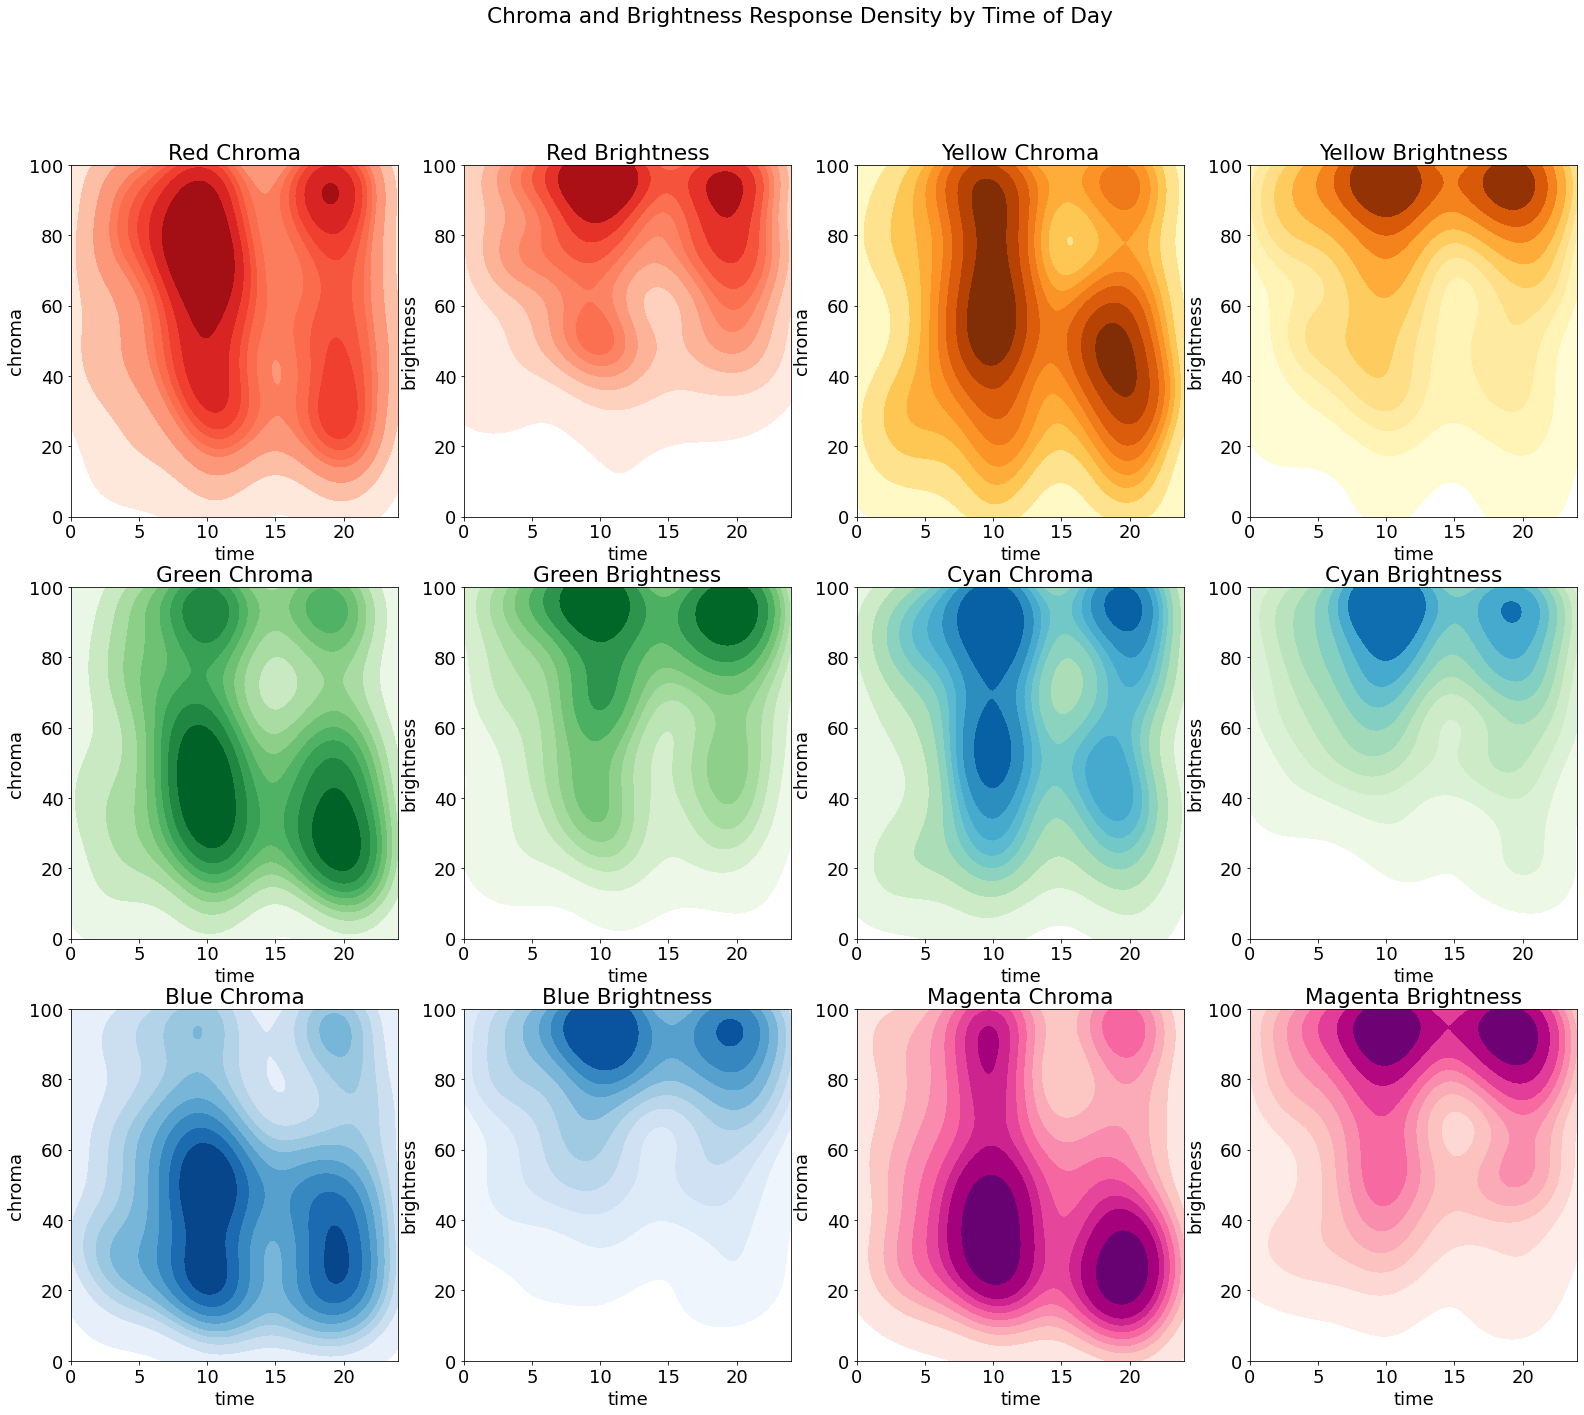

In [35]:
fig,axes = plt.subplots(3,4, figsize=(27,22))
plt.setp(axes, xlim=([0, 24]), ylim=([0, 100]))
plt.suptitle("Chroma and Brightness Response Density by Time of Day")

sns.kdeplot(ax=axes[0, 0], data=red_df, x='time', y='chroma', cmap="Reds", fill=True).title.set_text('Red Chroma')
sns.kdeplot(ax=axes[0, 2], data=yellow_df, x='time', y='chroma', cmap="YlOrBr", fill=True).title.set_text('Yellow Chroma')
sns.kdeplot(ax=axes[1, 0], data=green_df, x='time', y='chroma', cmap="Greens", fill=True).title.set_text('Green Chroma')
sns.kdeplot(ax=axes[1, 2], data=cyan_df, x='time', y='chroma', cmap="GnBu", fill=True).title.set_text('Cyan Chroma')
sns.kdeplot(ax=axes[2, 0], data=blue_df, x='time', y='chroma', cmap="Blues", fill=True).title.set_text('Blue Chroma')
sns.kdeplot(ax=axes[2, 2], data=magenta_df, x='time', y='chroma', cmap="RdPu", fill=True).title.set_text('Magenta Chroma')

sns.kdeplot(ax=axes[0, 1], data=red_df, x='time', y='brightness', cmap="Reds", fill=True).title.set_text('Red Brightness')
sns.kdeplot(ax=axes[0, 3], data=yellow_df, x='time', y='brightness', cmap="YlOrBr", fill=True).title.set_text('Yellow Brightness')
sns.kdeplot(ax=axes[1, 1], data=green_df, x='time', y='brightness', cmap="Greens", fill=True).title.set_text('Green Brightness')
sns.kdeplot(ax=axes[1, 3], data=cyan_df, x='time', y='brightness', cmap="GnBu", fill=True).title.set_text('Cyan Brightness')
sns.kdeplot(ax=axes[2, 1], data=blue_df, x='time', y='brightness', cmap="Blues", fill=True).title.set_text('Blue Brightness')
sns.kdeplot(ax=axes[2, 3], data=magenta_df, x='time', y='brightness', cmap="RdPu", fill=True).title.set_text('Magenta Brightness')

The charts immediately above this show the same data as the charts immediately below, but in a much more legible format.

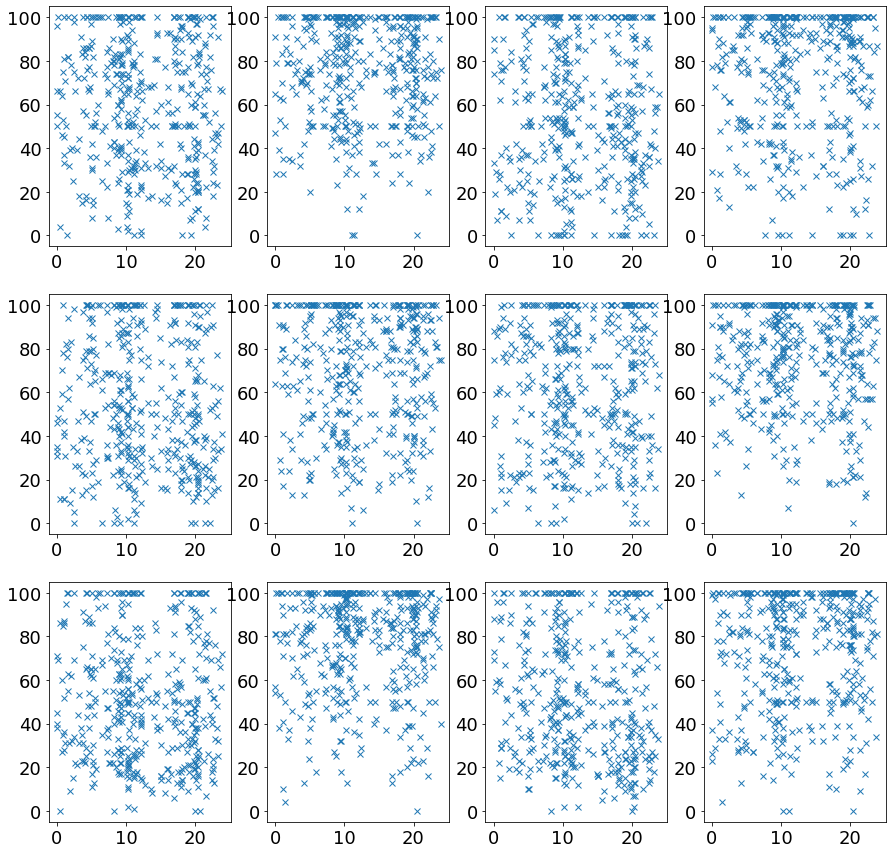

In [36]:
fig,ax = plt.subplots(nrows = 3,ncols = 4, figsize=(15,15))

ax[0,0].plot(red_df['time'], red_df['chroma'], 'x')
ax[0,1].plot(red_df['time'], red_df['brightness'], 'x')
ax[0,2].plot(yellow_df['time'], yellow_df['chroma'], 'x')
ax[0,3].plot(yellow_df['time'], yellow_df['brightness'], 'x')

ax[1,0].plot(green_df['time'], green_df['chroma'], 'x')
ax[1,1].plot(green_df['time'], green_df['brightness'], 'x')
ax[1,2].plot(cyan_df['time'], cyan_df['chroma'], 'x')
ax[1,3].plot(cyan_df['time'], cyan_df['brightness'], 'x')

ax[2,0].plot(blue_df['time'], blue_df['chroma'], 'x')
ax[2,1].plot(blue_df['time'], blue_df['brightness'], 'x')
ax[2,2].plot(magenta_df['time'], magenta_df['chroma'], 'x')
ax[2,3].plot(magenta_df['time'], magenta_df['brightness'], 'x')

## Categorized responses over time

In order to break down the responses per hue over time even further, the following charts break the time of day data down into 6 categories of 4 hours: 0:00 to 3:59, 4:00 to 7:59, 8:00 to 11:59, 12:00 to 15:59, 16:00 to 19:59, and finally 20:00 to 23:59.

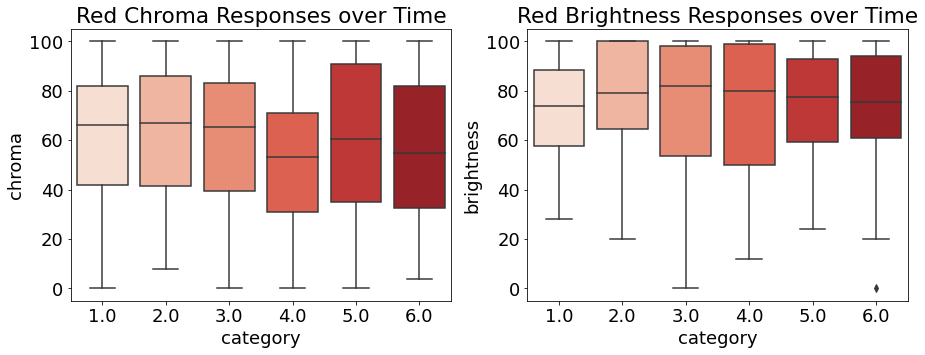

In [37]:
fig,axes = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(ax=axes[0], x="category", y="chroma", data=red_df, palette="Reds").title.set_text('Red Chroma Responses over Time')
sns.boxplot(ax=axes[1], x="category", y="brightness", data=red_df, palette="Reds").title.set_text('Red Brightness Responses over Time')

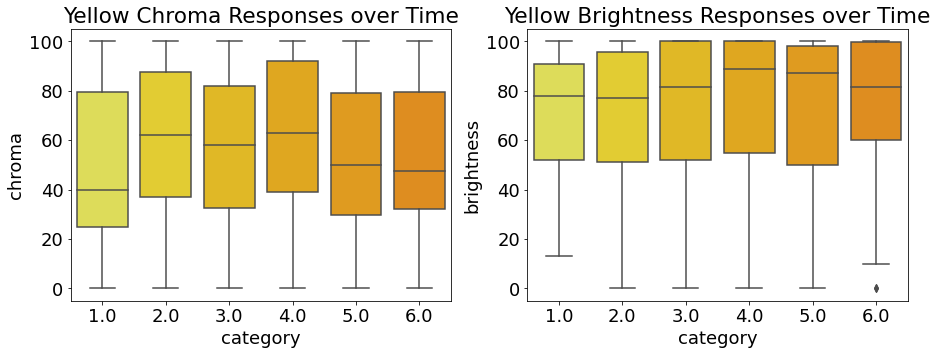

In [38]:
fig,axes = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(ax=axes[0], x="category", y="chroma", data=yellow_df, palette="Wistia").title.set_text('Yellow Chroma Responses over Time')
sns.boxplot(ax=axes[1], x="category", y="brightness", data=yellow_df, palette="Wistia").title.set_text('Yellow Brightness Responses over Time')

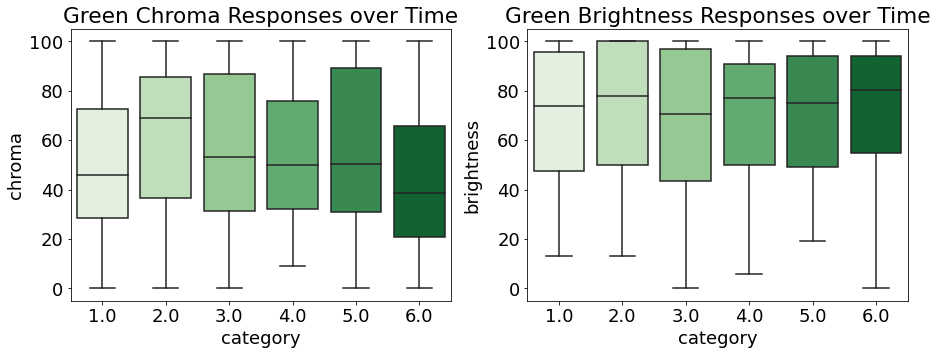

In [39]:
fig,axes = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(ax=axes[0], x="category", y="chroma", data=green_df, palette="Greens").title.set_text('Green Chroma Responses over Time')
sns.boxplot(ax=axes[1], x="category", y="brightness", data=green_df, palette="Greens").title.set_text('Green Brightness Responses over Time')

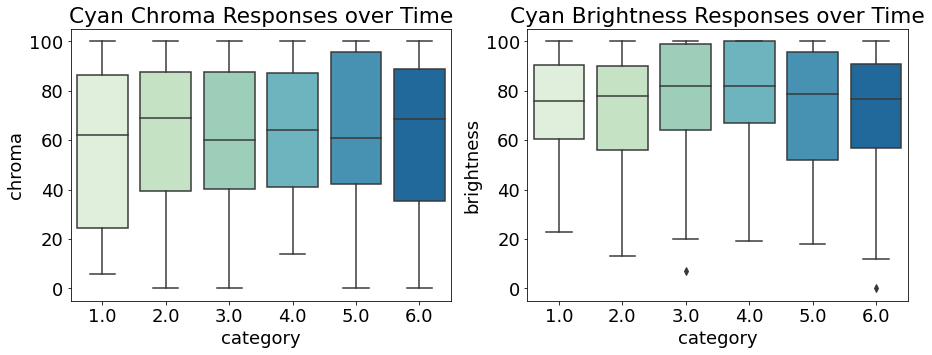

In [40]:
fig,axes = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(ax=axes[0], x="category", y="chroma", data=cyan_df, palette="GnBu").title.set_text('Cyan Chroma Responses over Time')
sns.boxplot(ax=axes[1], x="category", y="brightness", data=cyan_df, palette="GnBu").title.set_text('Cyan Brightness Responses over Time')

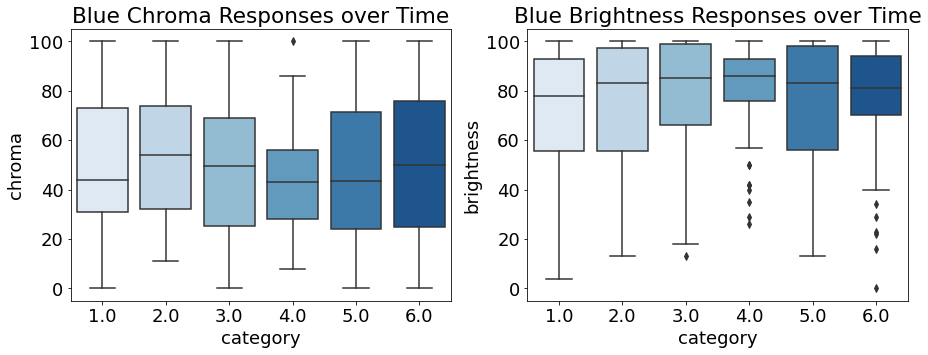

In [41]:
fig,axes = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(ax=axes[0], x="category", y="chroma", data=blue_df, palette="Blues").title.set_text('Blue Chroma Responses over Time')
sns.boxplot(ax=axes[1], x="category", y="brightness", data=blue_df, palette="Blues").title.set_text('Blue Brightness Responses over Time')

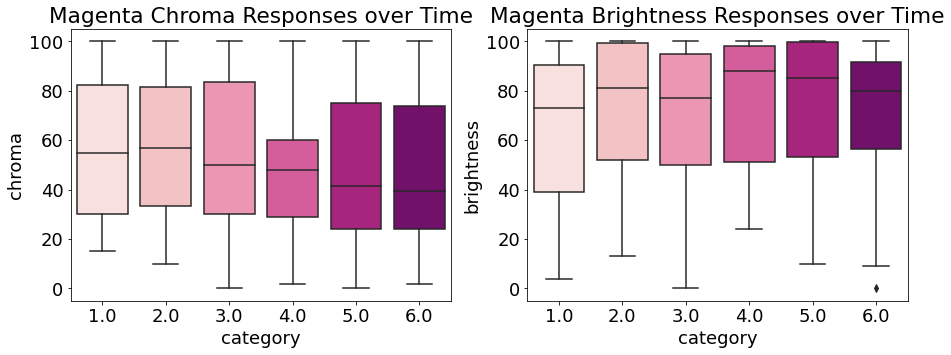

In [42]:
fig,axes = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(ax=axes[0], x="category", y="chroma", data=magenta_df, palette="RdPu").title.set_text('Magenta Chroma Responses over Time')
sns.boxplot(ax=axes[1], x="category", y="brightness", data=magenta_df, palette="RdPu").title.set_text('Magenta Brightness Responses over Time')

## By-hour comparisons
Finally, we decided to take the average response for each measure per hour and plot those against the time of day

In [43]:
redHr = red_df[['hour','chroma','brightness']].groupby('hour', as_index=False).mean()
yellowHr = yellow_df[['hour','chroma','brightness']].groupby('hour', as_index=False).mean()
greenHr = green_df[['hour','chroma','brightness']].groupby('hour', as_index=False).mean()
cyanHr = cyan_df[['hour','chroma','brightness']].groupby('hour', as_index=False).mean()
blueHr = blue_df[['hour','chroma','brightness']].groupby('hour', as_index=False).mean()
magentaHr = magenta_df[['hour','chroma','brightness']].groupby('hour', as_index=False).mean()
#magentaHr

The charts below chart the average saturation response per hour as a scatterplot with a line of best fit.
While this chart looks cleaner than the others, I don't think it's particularly useful as time is cyclical,
and the chart is ordered from 0 to 24 hours instead of from day to night.

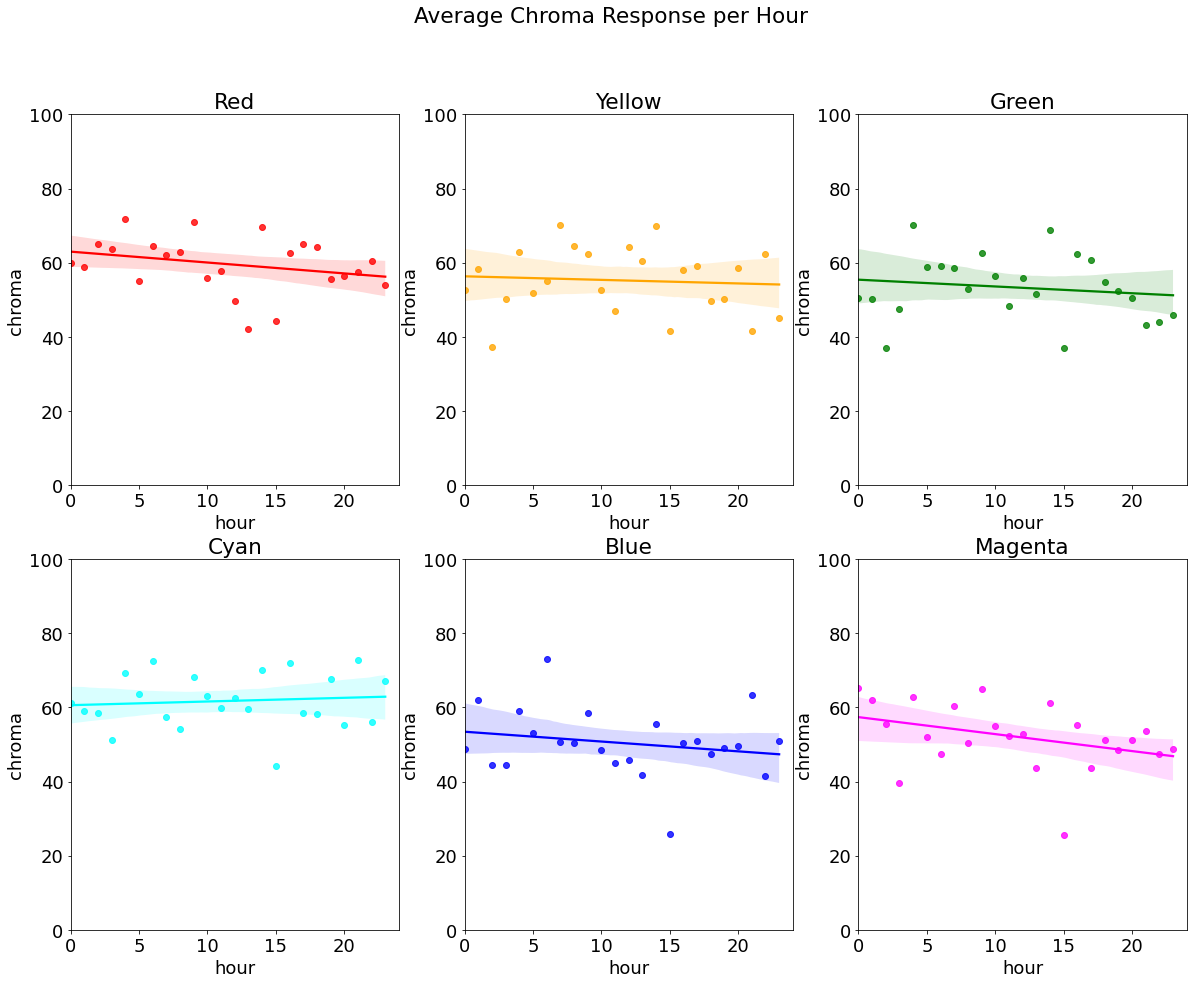

In [44]:
fig,axes = plt.subplots(2,3, figsize=(20,15))
plt.setp(axes, xlim=([0, 24]), ylim=([0, 100]))
fig.suptitle('Average Chroma Response per Hour')


rplt3 = sns.regplot(ax=axes[0, 0], data=redHr, x='hour', y='chroma', color="red")
yplt3 = sns.regplot(ax=axes[0, 1], data=yellowHr, x='hour', y='chroma', color="orange")
gplt3 = sns.regplot(ax=axes[0, 2], data=greenHr, x='hour', y='chroma', color="green")
cplt3 = sns.regplot(ax=axes[1, 0], data=cyanHr, x='hour', y='chroma', color="cyan")
bplt3 = sns.regplot(ax=axes[1, 1], data=blueHr, x='hour', y='chroma', color="blue")
mplt3 = sns.regplot(ax=axes[1, 2], data=magentaHr, x='hour', y='chroma', color="magenta")
rplt3.title.set_text('Red')
yplt3.title.set_text('Yellow')
gplt3.title.set_text('Green')
cplt3.title.set_text('Cyan')
bplt3.title.set_text('Blue')
mplt3.title.set_text('Magenta')

The four charts below show each measure by hour as a line graph. While it's not as clean as a scatterplot, I think it shows dips, rises and other trends in the data much more visibly than scatterplots, even if the information presented is the same.

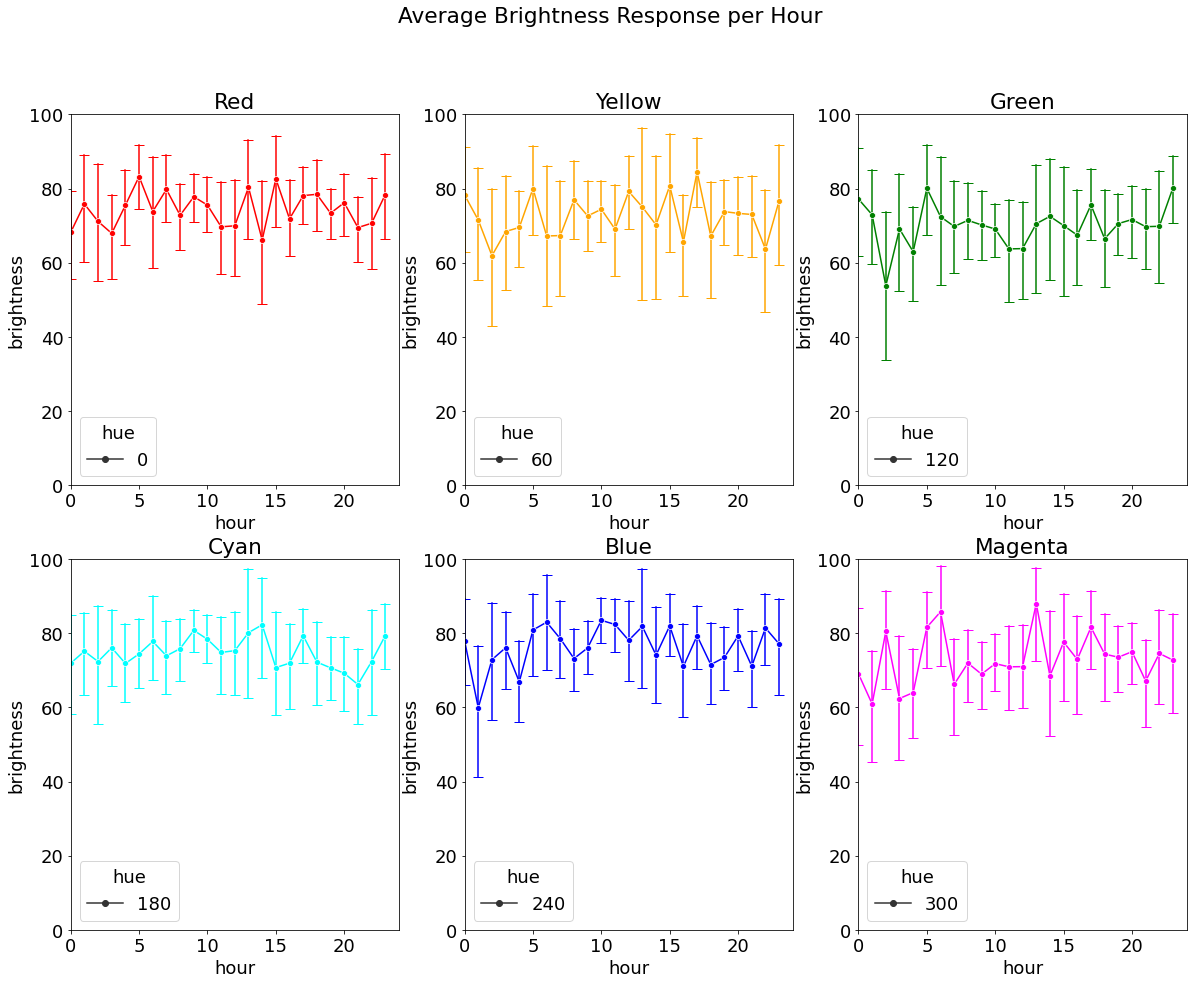

In [45]:
fig,axes = plt.subplots(2,3, figsize=(20,15))
plt.setp(axes, xlim=([0, 24]), ylim=([0, 100]))
fig.suptitle('Average Brightness Response per Hour')


rplt4 = sns.lineplot(ax=axes[0, 0], data=red_df, x='hour', y='brightness', style='hue', markers=True, dashes=False, err_style="bars", ci=95, err_kws={'capsize':5},color="red")
yplt4 = sns.lineplot(ax=axes[0, 1], data=yellow_df, x='hour', y='brightness', style='hue', markers=True, dashes=False, err_style="bars", ci=95, err_kws={'capsize':5},color="orange")
gplt4 = sns.lineplot(ax=axes[0, 2], data=green_df, x='hour', y='brightness', style='hue', markers=True, dashes=False, err_style="bars", ci=95, err_kws={'capsize':5},color="green")
cplt4 = sns.lineplot(ax=axes[1, 0], data=cyan_df, x='hour', y='brightness', style='hue', markers=True, dashes=False, err_style="bars", ci=95, err_kws={'capsize':5},color="cyan")
bplt4 = sns.lineplot(ax=axes[1, 1], data=blue_df, x='hour', y='brightness', style='hue', markers=True, dashes=False, err_style="bars", ci=95, err_kws={'capsize':5},color="blue")
mplt4 = sns.lineplot(ax=axes[1, 2], data=magenta_df, x='hour', y='brightness', style='hue', markers=True, dashes=False, err_style="bars", ci=95, err_kws={'capsize':5}, color="magenta")
rplt4.title.set_text('Red')
yplt4.title.set_text('Yellow')
gplt4.title.set_text('Green')
cplt4.title.set_text('Cyan')
bplt4.title.set_text('Blue')
mplt4.title.set_text('Magenta')


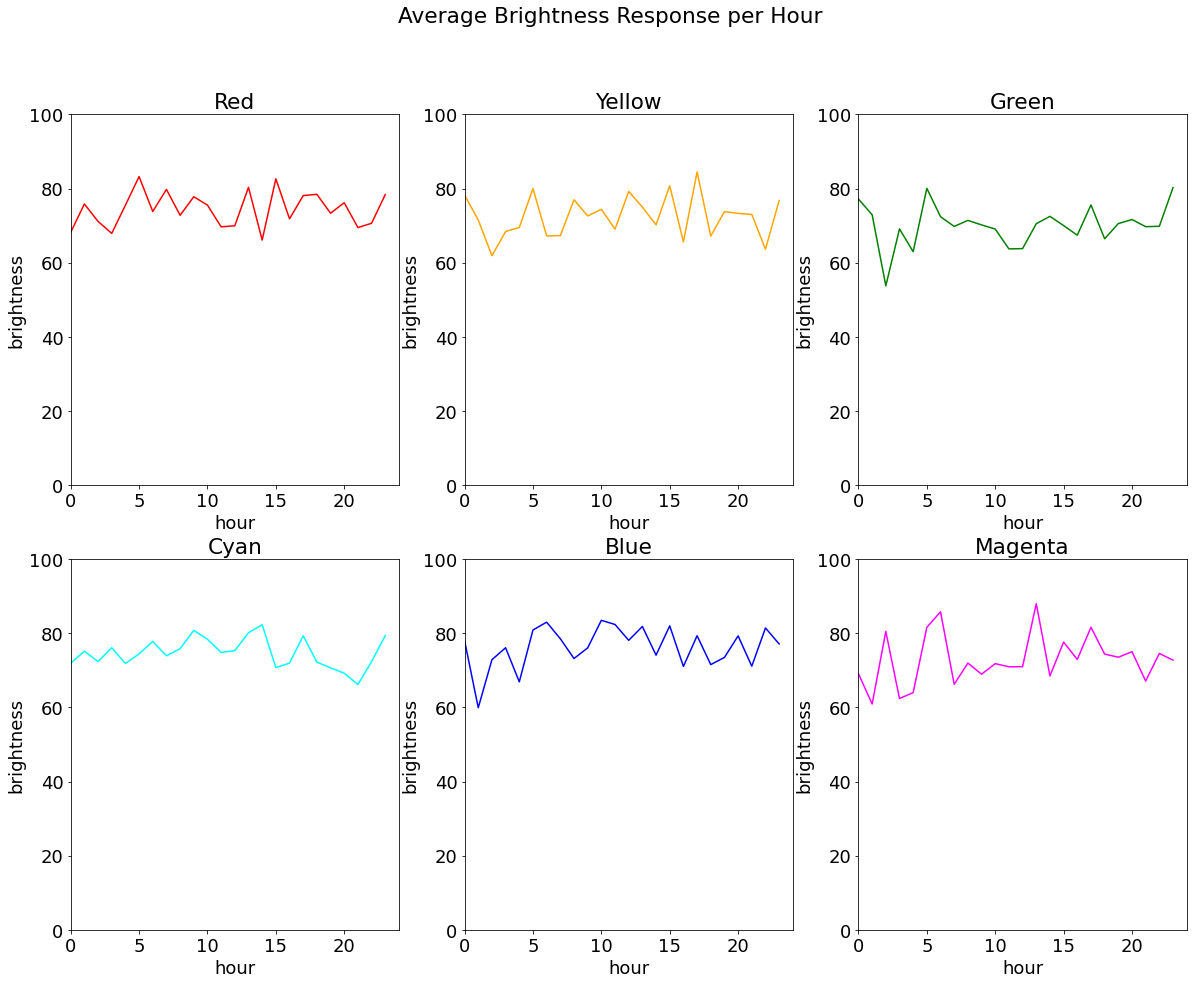

In [46]:
fig,axes = plt.subplots(2,3, figsize=(20,15))
plt.setp(axes, xlim=([0, 24]), ylim=([0, 100]))
fig.suptitle('Average Brightness Response per Hour')


rplt4 = sns.lineplot(ax=axes[0, 0], data=redHr, x='hour', y='brightness', markers=True, dashes=False,color="red")
yplt4 = sns.lineplot(ax=axes[0, 1], data=yellowHr, x='hour', y='brightness', markers=True, dashes=False,color="orange")
gplt4 = sns.lineplot(ax=axes[0, 2], data=greenHr, x='hour', y='brightness', markers=True, dashes=False,color="green")
cplt4 = sns.lineplot(ax=axes[1, 0], data=cyanHr, x='hour', y='brightness', markers=True, dashes=False,color="cyan")
bplt4 = sns.lineplot(ax=axes[1, 1], data=blueHr, x='hour', y='brightness', markers=True, dashes=False,color="blue")
mplt4 = sns.lineplot(ax=axes[1, 2], data=magentaHr, x='hour', y='brightness', markers=True, dashes=False, color="magenta")
rplt4.title.set_text('Red')
yplt4.title.set_text('Yellow')
gplt4.title.set_text('Green')
cplt4.title.set_text('Cyan')
bplt4.title.set_text('Blue')
mplt4.title.set_text('Magenta')


In [ ]:
df.groupby('category').count()/6

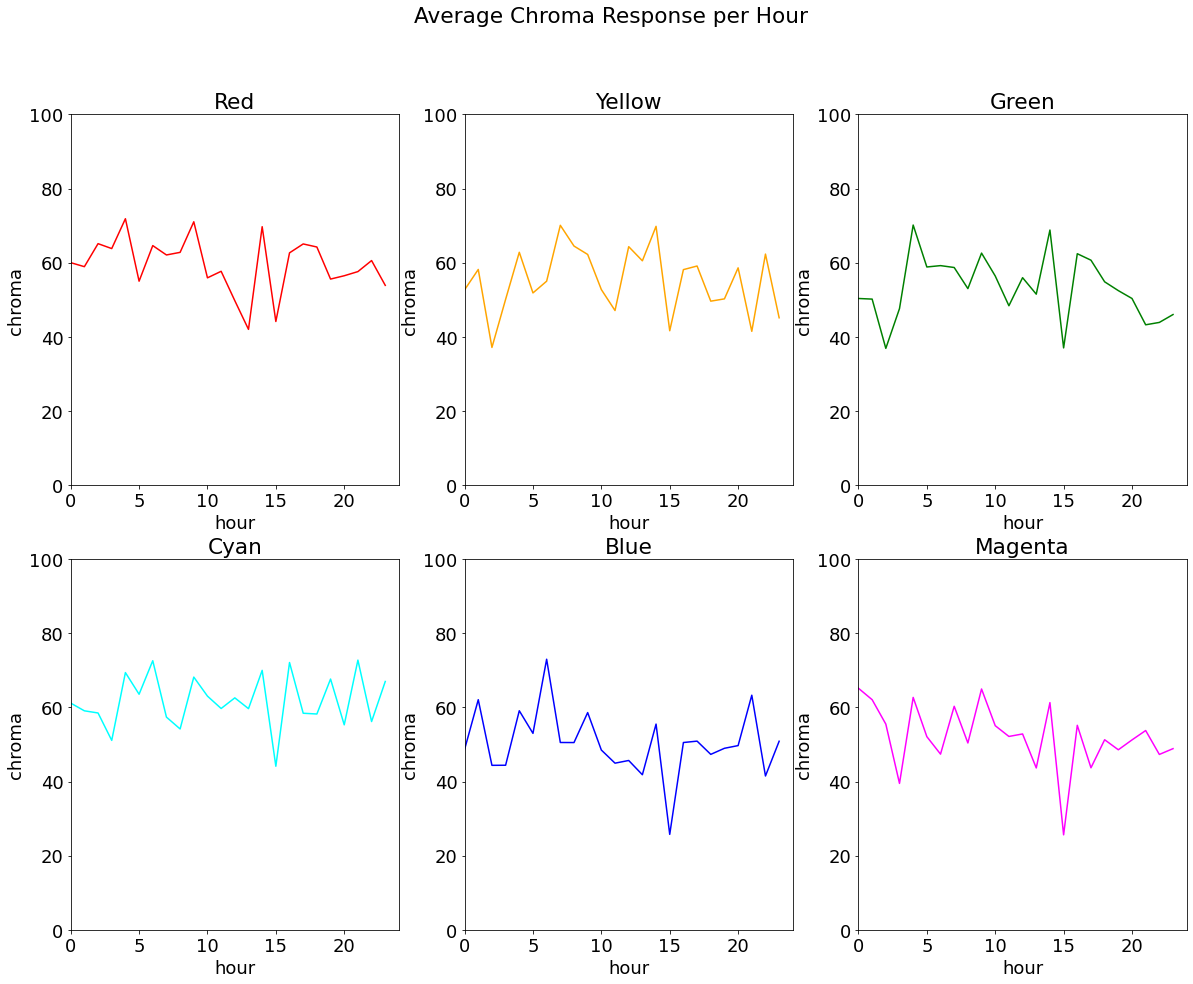

In [47]:
fig,axes = plt.subplots(2,3, figsize=(20,15))
plt.setp(axes, xlim=([0, 24]), ylim=([0, 100]))
fig.suptitle('Average Chroma Response per Hour')


rplt5 = sns.lineplot(ax=axes[0, 0], data=redHr, x='hour', y='chroma', markers=True, dashes=False,color="red")
yplt5 = sns.lineplot(ax=axes[0, 1], data=yellowHr, x='hour', y='chroma', markers=True, dashes=False,color="orange")
gplt5 = sns.lineplot(ax=axes[0, 2], data=greenHr, x='hour', y='chroma', markers=True, dashes=False,color="green")
cplt5 = sns.lineplot(ax=axes[1, 0], data=cyanHr, x='hour', y='chroma', markers=True, dashes=False,color="cyan")
bplt5 = sns.lineplot(ax=axes[1, 1], data=blueHr, x='hour', y='chroma', markers=True, dashes=False,color="blue")
mplt5 = sns.lineplot(ax=axes[1, 2], data=magentaHr, x='hour', y='chroma', markers=True, dashes=False, color="magenta")
rplt5.title.set_text('Red')
yplt5.title.set_text('Yellow')
gplt5.title.set_text('Green')
cplt5.title.set_text('Cyan')
bplt5.title.set_text('Blue')
mplt5.title.set_text('Magenta')


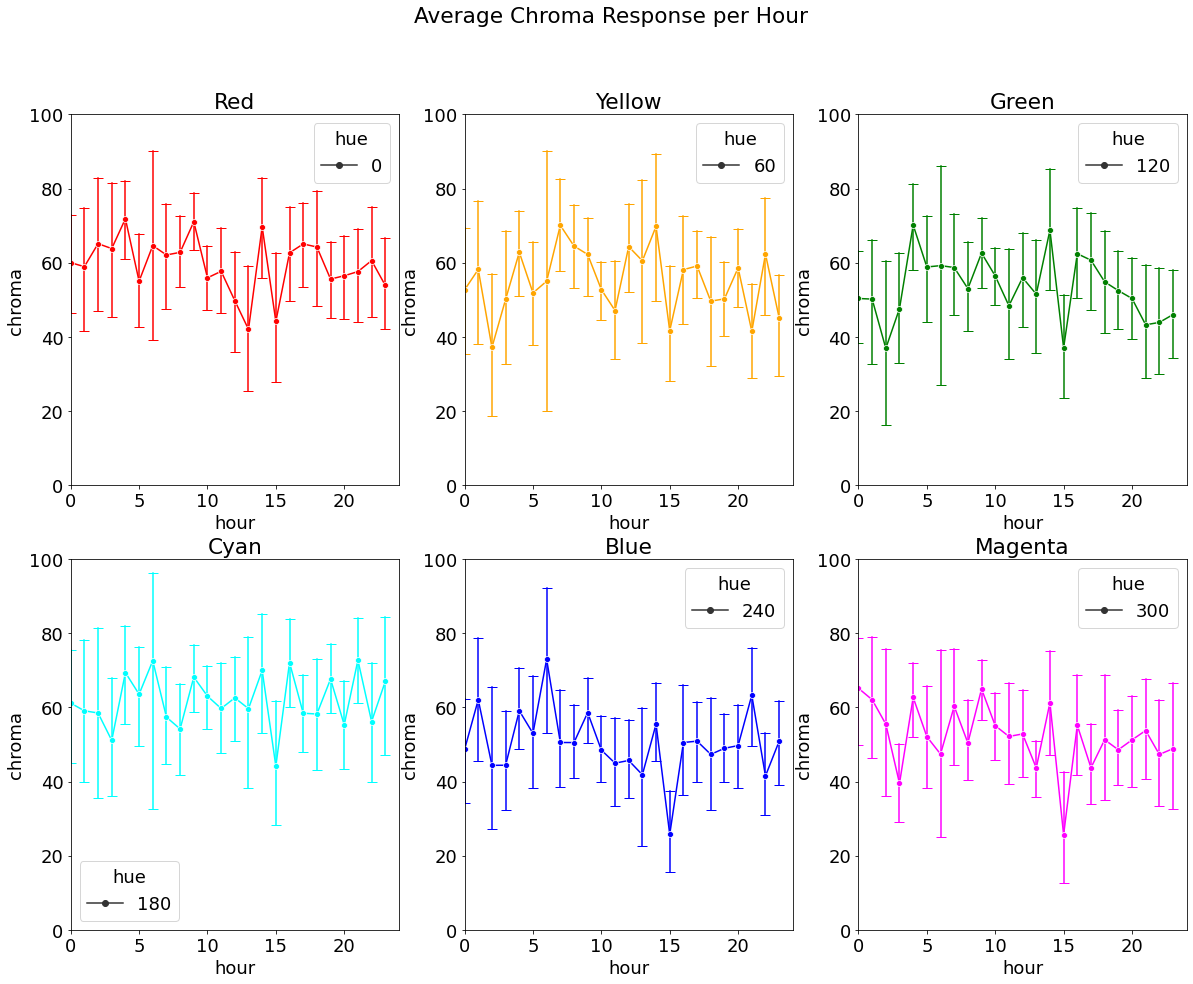

In [48]:
fig,axes = plt.subplots(2,3, figsize=(20,15))
plt.setp(axes, xlim=([0, 24]), ylim=([0, 100]))
fig.suptitle('Average Chroma Response per Hour')


rplt4 = sns.lineplot(ax=axes[0, 0], data=red_df, x='hour', y='chroma', style='hue', markers=True, dashes=False, err_style="bars", ci=95, err_kws={'capsize':5},color="red")
yplt4 = sns.lineplot(ax=axes[0, 1], data=yellow_df, x='hour', y='chroma', style='hue', markers=True, dashes=False, err_style="bars", ci=95, err_kws={'capsize':5},color="orange")
gplt4 = sns.lineplot(ax=axes[0, 2], data=green_df, x='hour', y='chroma', style='hue', markers=True, dashes=False, err_style="bars", ci=95, err_kws={'capsize':5},color="green")
cplt4 = sns.lineplot(ax=axes[1, 0], data=cyan_df, x='hour', y='chroma', style='hue', markers=True, dashes=False, err_style="bars", ci=95, err_kws={'capsize':5},color="cyan")
bplt4 = sns.lineplot(ax=axes[1, 1], data=blue_df, x='hour', y='chroma', style='hue', markers=True, dashes=False, err_style="bars", ci=95, err_kws={'capsize':5},color="blue")
mplt4 = sns.lineplot(ax=axes[1, 2], data=magenta_df, x='hour', y='chroma', style='hue', markers=True, dashes=False, err_style="bars", ci=95, err_kws={'capsize':5}, color="magenta")
rplt4.title.set_text('Red')
yplt4.title.set_text('Yellow')
gplt4.title.set_text('Green')
cplt4.title.set_text('Cyan')
bplt4.title.set_text('Blue')
mplt4.title.set_text('Magenta')
